#### Reading data 
In this cell, we are reading data from ClusterSet1.txt with whitespace as delimiter. We have standardized the data so that feature skewing is avoided.

In [38]:
# allow inline plots
%matplotlib notebook

# importing necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans as kmeans
from sklearn.preprocessing import StandardScaler
# reading in the CSV data

data = pd.read_csv('ClusterSet2.txt', delim_whitespace=True, header = None)
X = data.values
X = StandardScaler().fit_transform(X)


def create_kmeans(clusters, X) :
    k = kmeans(n_clusters=clusters)
    k.fit(X)
    return k
#kL = create_kmeans(CLUSTERS, X)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,11028.07,6702.04,4470.94,15579.87,-7753.72,15718.69,-16336.75,23388.27,-10070.79,-17610.58,...,9234.55,-13100.47,-16312.28,5339.39,2576.32,-578.25,-18922.81,3889.27,-6526.45,9500.54
1,-5971.07,180.97,2107.04,-6044.71,2982.43,14717.25,22267.83,7095.27,-11577.95,-1347.19,...,12892.81,1411.39,-2005.96,-1206.95,16842.39,-5596.22,-2398.54,3536.75,-3101.54,3156.64
2,13544.97,-6939.86,-6174.26,3282.40,17375.98,16133.28,10400.00,-9105.54,13710.60,-3212.62,...,4661.83,6610.35,3666.46,-7899.08,-6537.19,-11040.24,-4835.45,-4100.42,647.94,9799.90
3,13766.27,-6980.86,-6284.17,2782.46,17413.99,16470.90,10310.27,-9127.55,13359.77,-3116.59,...,4630.12,6397.50,3536.63,-7963.43,-6452.84,-11081.07,-4808.21,-4047.68,801.89,9791.01
4,11365.89,6837.32,3688.05,14933.74,-7580.24,15883.05,-16488.75,23298.81,-11975.65,-16502.05,...,9856.15,-12993.38,-16327.77,5222.55,2139.96,-894.92,-19808.40,3575.14,-6503.23,9654.53


In [39]:
def plot_line(X, Y) :
    ax = plt.subplots()[1]
    plt.plot(X, Y)
    ax.set_ylabel('distortion')
    ax.set_xlabel('cluster count')

#### Choosing K
In order to choose the perfect K, we vary k from 1 to 15 and plot the distortion values (within cluster scatter) for each kmeans answer. The distortion value doesn't change after cluster count = 10, thus, it is chosen as the best K for this dataset.

<IPython.core.display.Javascript object>


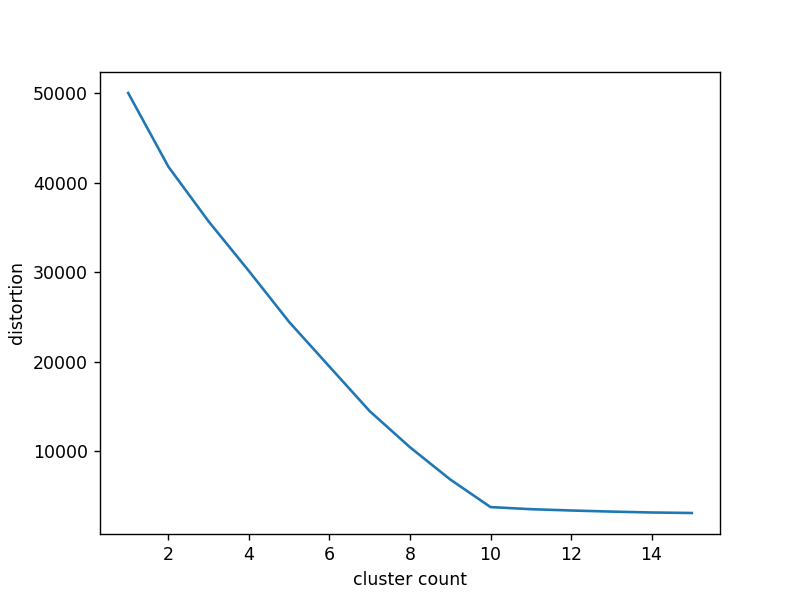

In [40]:
total_cluster_limit = 15
inertia = {}
for cluster in range(1, total_cluster_limit+1) :
#     print(cluster)
    k = create_kmeans(cluster, X)
    inertia[cluster] = k.inertia_

plot_line(list(inertia.keys()), list(inertia.values()))